<a href="https://colab.research.google.com/github/kavyapriia/Drone-Battery-Optimizer/blob/main/Drone_Battery_Life_Optimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

print("Libraries imported successfully!")

Libraries imported successfully!


In [ ]:
# Constants
g = 9.81  # Gravitational acceleration (m/s^2)
Cd = 0.5  # Drag coefficient (assumed constant)
A = 0.1   # Cross-sectional area of the drone (m^2)
battery_capacity = 500  # Battery capacity in Wh (example value)

# Function to calculate air density based on altitude and temperature
def air_density(altitude, temperature=20):
    """
    Calculate air density using the barometric formula.
    altitude: in meters
    temperature: in degrees Celsius
    """
    T_kelvin = temperature + 273.15  # Convert to Kelvin
    P0 = 101325  # Standard atmospheric pressure at sea level (Pa)
    R = 287.05   # Specific gas constant for air (J/(kg·K))
    L = 0.0065   # Temperature lapse rate (K/m)
    T0 = 288.15  # Standard temperature at sea level (K)
    return (P0 / (R * T_kelvin)) * (1 - (L * altitude) / T0) ** (g / (R * L))

# Function to calculate total power consumption
def total_power(mass, payload, speed, altitude, temperature=20):
    """
    Calculate total power consumption of the drone.
    mass: mass of the drone (kg)
    payload: payload weight (kg)
    speed: flight speed (m/s)
    altitude: altitude (m)
    temperature: ambient temperature (°C)
    """
    total_mass = mass + payload
    rho = air_density(altitude, temperature)

    # Thrust power
    F_thrust = total_mass * g
    P_thrust = F_thrust * speed

    # Drag power
    F_drag = 0.5 * rho * speed**2 * Cd * A
    P_drag = F_drag * speed

    # Total power
    return P_thrust + P_drag

# Function to calculate flight time
def flight_time(mass, payload, speed, altitude, temperature=20):
    """
    Calculate flight time based on total power consumption.
    """
    P_total = total_power(mass, payload, speed, altitude, temperature)
    return battery_capacity / P_total

# Function to optimize speed for maximum flight time
def optimize_speed(mass, payload, altitude, temperature=20):
    """
    Optimize flight speed for maximum flight time.
    """
    # Objective function to minimize (negative flight time)
    def objective(speed):
        return -flight_time(mass, payload, speed, altitude, temperature)

    # Initial guess for speed
    initial_speed = 5  # m/s
    bounds = [(1, 20)]  # Speed bounds (1 to 20 m/s)

    # Minimize the negative flight time
    result = minimize(objective, initial_speed, bounds=bounds)
    return result.x[0]  # Optimal speed

In [ ]:
# Interactive Input
if __name__ == "__main__":
    print("Welcome to the Drone Battery Life Optimizer!")
    mass = float(input("Enter drone mass (kg): "))
    payload = float(input("Enter payload weight (kg): "))
    altitude = float(input("Enter altitude (m): "))
    temperature = float(input("Enter temperature (°C): "))

    optimal_speed = optimize_speed(mass, payload, altitude, temperature)
    max_time = flight_time(mass, payload, optimal_speed, altitude, temperature)

    print(f"\nOptimal Flight Speed: {optimal_speed:.2f} m/s")
    print(f"Maximum Flight Time: {max_time:.2f} hours")

Welcome to the Drone Battery Life Optimizer!
Enter drone mass (kg): 2.0
Enter payload weight (kg): 0.5
Enter altitude (m): 0.1
Enter temperature (°C): 0.5

Optimal Flight Speed: 1.00 m/s
Maximum Flight Time: 20.36 hours


Welcome to the Drone Battery Life Optimizer!
Enter drone mass (kg): 2.0
Enter payload weight (kg): 0.5
Enter altitude (m): 100
Enter temperature (°C): 20


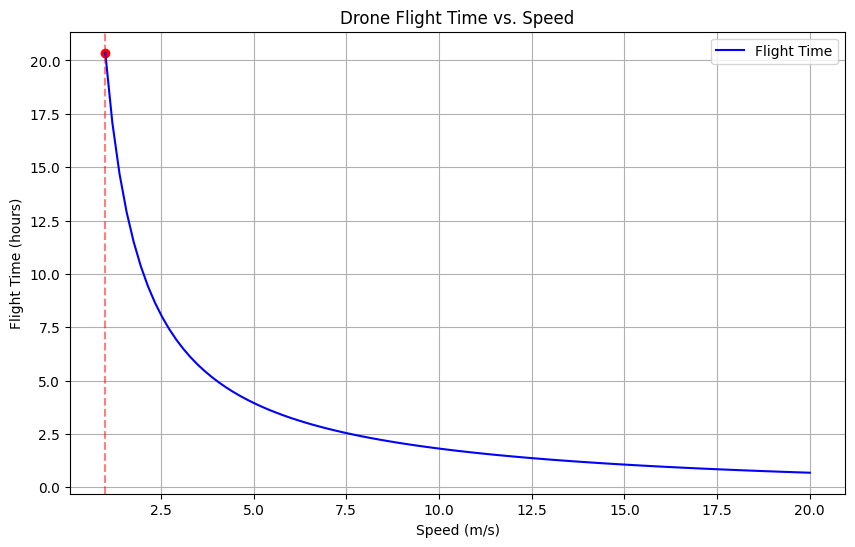

Optimal Speed: 1.00 m/s
Maximum Flight Time: 20.36 hours


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Constants
g = 9.81  # Gravitational acceleration (m/s^2)
Cd = 0.5  # Drag coefficient (assumed constant)
A = 0.1   # Cross-sectional area of the drone (m^2)
battery_capacity = 500  # Battery capacity in Wh (example value)

# Function to calculate air density based on altitude and temperature
def air_density(altitude, temperature=20):
    """
    Calculate air density using the barometric formula.
    altitude: in meters
    temperature: in degrees Celsius
    """
    T_kelvin = temperature + 273.15  # Convert to Kelvin
    P0 = 101325  # Standard atmospheric pressure at sea level (Pa)
    R = 287.05   # Specific gas constant for air (J/(kg·K))
    L = 0.0065   # Temperature lapse rate (K/m)
    T0 = 288.15  # Standard temperature at sea level (K)
    return (P0 / (R * T_kelvin)) * (1 - (L * altitude) / T0) ** (g / (R * L))

# Function to calculate total power consumption
def total_power(mass, payload, speed, altitude, temperature=20):
    """
    Calculate total power consumption of the drone.
    mass: mass of the drone (kg)
    payload: payload weight (kg)
    speed: flight speed (m/s)
    altitude: altitude (m)
    temperature: ambient temperature (°C)
    """
    total_mass = mass + payload
    rho = air_density(altitude, temperature)

    # Thrust power
    F_thrust = total_mass * g
    P_thrust = F_thrust * speed

    # Drag power
    F_drag = 0.5 * rho * speed**2 * Cd * A
    P_drag = F_drag * speed

    # Total power
    return P_thrust + P_drag

# Function to calculate flight time
def flight_time(mass, payload, speed, altitude, temperature=20):
    """
    Calculate flight time based on total power consumption.
    """
    P_total = total_power(mass, payload, speed, altitude, temperature)
    return battery_capacity / P_total

# Function to optimize speed for maximum flight time
def optimize_speed(mass, payload, altitude, temperature=20):
    """
    Optimize flight speed for maximum flight time.
    """
    # Objective function to minimize (negative flight time)
    def objective(speed):
        return -flight_time(mass, payload, speed, altitude, temperature)

    # Initial guess for speed
    initial_speed = 5  # m/s
    bounds = [(1, 20)]  # Speed bounds (1 to 20 m/s)

    # Minimize the negative flight time
    result = minimize(objective, initial_speed, bounds=bounds)
    return result.x[0]  # Optimal speed

# Collect user inputs
print("Welcome to the Drone Battery Life Optimizer!")
mass = float(input("Enter drone mass (kg): "))
payload = float(input("Enter payload weight (kg): "))
altitude = float(input("Enter altitude (m): "))
temperature = float(input("Enter temperature (°C): "))

# Test speeds
speeds = np.linspace(1, 20, 100)  # Speed range (1 to 20 m/s)
times = [flight_time(mass, payload, v, altitude, temperature) for v in speeds]

# Plot flight time vs. speed
plt.figure(figsize=(10, 6))
plt.plot(speeds, times, label="Flight Time", color="blue")
plt.xlabel("Speed (m/s)")
plt.ylabel("Flight Time (hours)")
plt.title("Drone Flight Time vs. Speed")
plt.grid()
plt.legend()

# Find optimal speed
optimal_speed = optimize_speed(mass, payload, altitude, temperature)
max_time = flight_time(mass, payload, optimal_speed, altitude, temperature)

# Highlight the optimal speed on the graph
plt.scatter(optimal_speed, max_time, color="red", label=f"Optimal Speed: {optimal_speed:.2f} m/s")
plt.axvline(optimal_speed, color="red", linestyle="--", alpha=0.5)

plt.show()

# Print results
print(f"Optimal Speed: {optimal_speed:.2f} m/s")
print(f"Maximum Flight Time: {max_time:.2f} hours")